In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [125]:
!pip install seaborn

In [126]:
import seaborn as sns

In [127]:
from google.colab import files
uploaded = files.upload()

Saving churn.xlsx to churn (2).xlsx


In [128]:
df =pd.read_excel("churn.xlsx")

In [129]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
df1 =df.copy()
df2 =df.copy()
df3 =df.copy()
df4 =df.copy()
df5 =df.copy()

In [132]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [133]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


<Axes: xlabel='count', ylabel='Churn'>

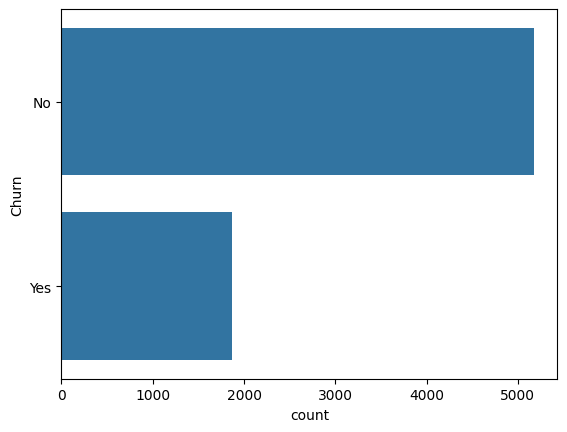

In [134]:
#80 : 20 ratio or more than that is imbalance in dataset
sns.countplot(df.Churn)

In [135]:
df.dropna(inplace= True)

In [136]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [137]:
df.shape

(7032, 21)

In [138]:
df.drop_duplicates(inplace= True)

In [139]:
df.shape

(7032, 21)

In [140]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015205,0.219556,0.102001
tenure,0.015205,1.000000,0.246852,0.825874
MonthlyCharges,0.219556,0.246852,1.000000,0.651065
TotalCharges,0.102001,0.825874,0.651065,1.000000


<Axes: >

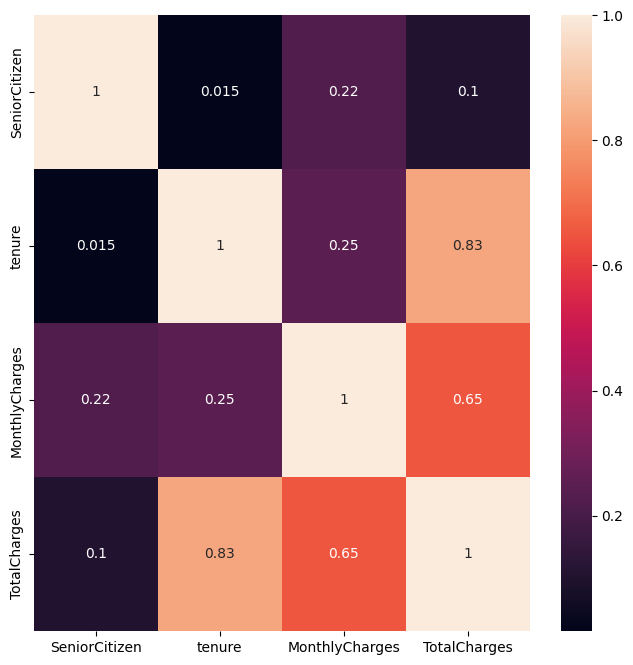

In [141]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot= True)

<Axes: xlabel='gender', ylabel='count'>

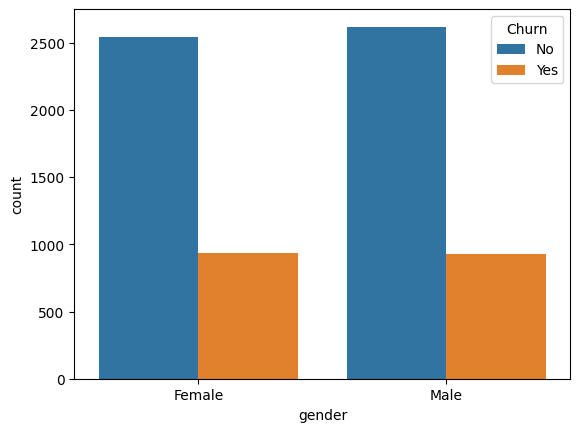

In [142]:
sns.countplot(x= "gender" , hue= "Churn",data= df)

In [143]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6352
No,680


In [144]:
#preprocessing the dataset
df.drop(['customerID'], axis=1, inplace=True)

In [145]:
df.shape

(7032, 20)

In [146]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [147]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [148]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [149]:
from pandas.core.dtypes.common import is_numeric_dtype

In [150]:
for i in df.columns:
  if is_numeric_dtype(df[i]):
    continue
  else:
    df[i]=le.fit_transform(df[i])

In [151]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [152]:
x = df.drop(['Churn'], axis= 1)

In [153]:
y =df[['Churn']]

In [154]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [155]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [156]:
x.shape

(7032, 19)

In [157]:
#imbalance Data handleing
df.Churn.value_counts()

,count
Churn,
0,5163
1,1869


# ***sampling Technique(to data balance)***

# **synthetic minority oversampling technique(SMOTE)** [mostly use]

In [158]:
!pip install imblearn

In [176]:
from imblearn.over_sampling import SMOTE #boroter soman hoye jabe (নতুন synthetic sample generate করা হয়েছে)
im = SMOTE(random_state= 251)

In [160]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [161]:
x_new, y_new = im.fit_resample(x, y)

In [162]:
y_new.value_counts()

,count
Churn,
0,5163
1,5163


# **Near Miss For Under Sampling**

In [163]:
from imblearn.under_sampling import RandomUnderSampler #smaller tar soman hoya jabe
rus = RandomUnderSampler(random_state=51)

In [164]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [165]:
x_res, y_res = rus.fit_resample(x, y)

In [166]:
y_res.value_counts()

,count
Churn,
0,1869
1,1869


# ***Over Sampling***

In [167]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [175]:
from imblearn.over_sampling import RandomOverSampler #sample duplicate করা হয়েছে

In [172]:
ros = RandomOverSampler(random_state=251)

In [173]:
x_res1, y_res1 = ros.fit_resample(x, y)

In [174]:
y_res1.value_counts()

,count
Churn,
0,5163
1,5163


# **CROSS VALIDATION**

# ***Hold out cross validation***

In [180]:
from sklearn.model_selection import train_test_split as tts #to split the data set to tain the model. "random_state" for data will shuffle in on way. "test_size" how much will train
x_train,x_test,y_train,y_test =tts(x_new,y_new,test_size=0.3,random_state= 251)

In [181]:
x_train.to_csv("holdOutCrossValidation.csv")

In [182]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [183]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [184]:
dt.score(x_test,y_test)

0.7846998063266624

In [185]:
#without sampling
x.shape

(7032, 19)

In [192]:
x_train1, x_test1, y_train1, y_test1 = tts(
    x, y, train_size=0.8, random_state=251
)

In [193]:
dt.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [194]:
dt.score(x_test1,y_test1)

0.7149964463397299

# ***K-fold Cross Validation***

In [196]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [197]:
kfold = KFold(n_splits = 4)

In [198]:
result = cross_val_score(dt, x_res1, y_res1, cv=kfold)
result

array([0.81061193, 0.81138652, 0.86788067, 0.99573809])

In [199]:
result.mean() #model's accuracy

np.float64(0.8714043008087162)

In [200]:
result.max()

np.float64(0.9957380860131732)

In [201]:
result.min()

np.float64(0.8106119287374128)

# ***Stratified K-fold Cross Validation***

In [202]:
from sklearn.model_selection import StratifiedKFold

In [204]:
sk = StratifiedKFold(n_splits= 4) #k_fold by default is 5 ,n_splits set the comtomize k-fold value

In [209]:
result1 = cross_val_score(dt, x_res1, y_res1, cv=sk)
result1 # values have less defference so StratifiedKFold better

array([0.86909373, 0.86250968, 0.88182875, 0.90081364])

In [210]:
result1.mean()

np.float64(0.8785614487206306)

In [211]:
result1.max()

np.float64(0.9008136381247579)

In [212]:
result1.min()

np.float64(0.8625096824167312)

# ***Leave One Out Cross Validation***

In [213]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [214]:
result2 = cross_val_score(dt, x_res1, y_res1, cv=sk)
result2

array([0.86250968, 0.86599535, 0.87601705, 0.89926385])

In [215]:
result2.mean() # it is a time consuming process(itaration basi so runtime basi)

np.float64(0.8759464834332762)

In [216]:
result2.max()

np.float64(0.8992638512204572)

In [217]:
result2.min()

np.float64(0.8625096824167312)